In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import unicodedata

%precision 3
%matplotlib inline

In [3]:
sns.set()
sns.set_style('darkgrid',{"axes.facecolor": ".9"})
sns.set_context('notebook')

In [17]:
df = pd.read_csv('data/test2.csv', encoding="utf_8_sig", header=None)
df.columns = ["name", "play", "like", "creator", "size", "date"]
df[:3]

,name,play,like,creator,size,date
0,ほーんてっど,52,11,チキンマンα,116MB,2020/3/5（木） 09:00
1,Room,59,3,w_up,98MB,2020/3/5（木） 09:00
2,onsen,"1,546",67,チキンマンα,87MB,2020/3/5（木） 09:00


In [18]:
df['like'] = df['like'].astype(int)
df['play'] = df['play'].str.replace(',', "")
df['play'] = df['play'].astype(int)
df['size'] = df['size'].str[:-2]
df['size'] = df['size'].astype(int)
df['date'] = df['date'].str.split('（', expand=True)
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

In [19]:
df.describe()

,play,like,size
count,3.000000,3.000000,3.000000
mean,552.333333,27.000000,100.333333
std,860.547694,34.871192,14.640128
min,52.000000,3.000000,87.000000
25%,55.500000,7.000000,92.500000
50%,59.000000,11.000000,98.000000
75%,802.500000,39.000000,107.000000
max,1546.000000,67.000000,116.000000


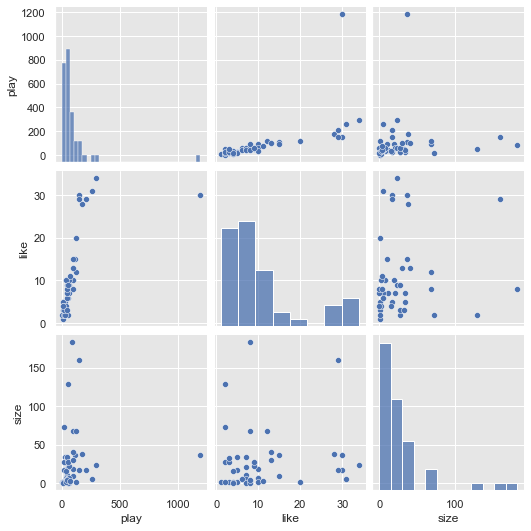

In [42]:
sns.pairplot(df)

(array([22., 15.,  5.,  1.,  1.,  2.,  0.,  0.,  0.,  0.]),
 array([  5. ,  54.5, 104. , 153.5, 203. , 252.5, 302. , 351.5, 401. ,
        450.5, 500. ]),
 <BarContainer object of 10 artists>)

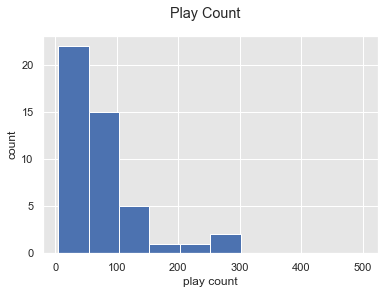

In [43]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Play Count')
ax = fig.add_subplot(111, xlabel='play count', ylabel='count')
ax.hist(df['play'], range=(df['play'].min(), 500))

(array([11., 15.,  9.,  4.,  1.,  0.,  1.,  5.,  1.,  0.]),
 array([ 1. ,  4.9,  8.8, 12.7, 16.6, 20.5, 24.4, 28.3, 32.2, 36.1, 40. ]),
 <BarContainer object of 10 artists>)

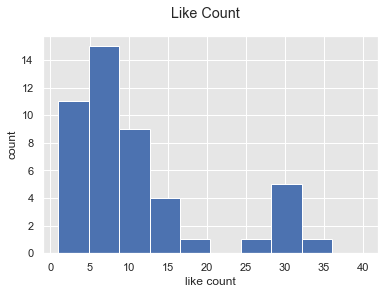

In [44]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Like Count')
ax = fig.add_subplot(111, xlabel='like count', ylabel='count')
ax.hist(df['like'], range=(df['like'].min(), 40))

{'whiskers': [<matplotlib.lines.Line2D at 0x1939c110d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1939c11f320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1939c0fe8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1939c11f8d0>],
 'fliers': [],
 'means': []}

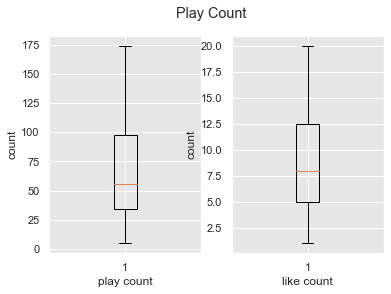

In [45]:
fig = plt.figure(figsize=(6, 4))
fig.suptitle('Play Count')
ax1 = fig.add_subplot(1, 2, 1, xlabel='play count', ylabel='count')
ax2 = fig.add_subplot(1, 2, 2, xlabel='like count', ylabel='count')
ax1.boxplot(df['play'], sym="")
ax2.boxplot(df['like'], sym="")